In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, LinearRegression
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

forest_reg = RandomForestRegressor()
tree_reg = DecisionTreeRegressor()
lin_reg_model = LinearRegression()

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in tqdm(range(1, len(X_train),1)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [13]:
Research_Area_Code = 42

In [17]:
# Load Data
FaultPecent = pd.read_csv('data/Mon_Dis_JPCC_CRACK_INDEX.csv')
TST = pd.read_csv('data/TST_Filtered.csv')
Hum = pd.read_csv('data/humidity.csv')
Temp = pd.read_csv('data/CLM_VWS_TEMP_ANNUAL.csv')
Traffic = pd.read_csv('data/AnnualTraffic.csv')

In [19]:
TST = TST[['SHRP_ID','CONSTRUCTION_NO','REPR_THICKNESS']]
Hum = Hum[Hum.STATE_CODE == Research_Area_Code].drop(['STATE_CODE','STATE_CODE_EXP'], axis = 1)
Temp = Temp[Temp.STATE_CODE == Research_Area_Code].drop(['STATE_CODE','STATE_CODE_EXP'], axis = 1)
Traffic = Traffic[Traffic.STATE_CODE == Research_Area_Code].drop(['STATE_CODE','STATE_CODE_EXP'], axis = 1)
FaultPecent = FaultPecent[FaultPecent.STATE_CODE == Research_Area_Code].drop(['STATE_CODE','STATE_CODE_EXP'], axis = 1)

FaultPecent = FaultPecent[['SHRP_ID','SURVEY_DATE','HPMS16_CRACKING_PERCENT_JPCC']]
# FaultPecent['SURVEY_DATE'] = pd.DatetimeIndex(FaultPecent['SURVEY_DATE']).year
# FaultPecent.rename(columns = {'SURVEY_DATE':'YEAR'}, inplace = True)
# TST = TST[['SHRP_ID','MATL_CODE']]
# Hum = Hum[['SHRP_ID','YEAR','MAX_ANN_HUM_AVG','MIN_ANN_HUM_AVG']]
# Temp = Temp[['SHRP_ID','YEAR','MEAN_ANN_TEMP_AVG']]
# Traffic = Traffic[['SHRP_ID','YEAR','ANNUAL_TRUCK_VOLUME_TREND']]


# FaultPecent = FaultPecent.dropna()
FaultPecent['SURVEY_DATE'] = pd.DatetimeIndex(FaultPecent['SURVEY_DATE']).year
FaultPecent.rename(columns = {'SURVEY_DATE':'YEAR'}, inplace = True)

In [26]:
Weather = pd.merge(Temp,Hum, on = ['SHRP_ID','YEAR','VWS_ID']).drop(['VWS_ID'], axis = 1)
Prepared_data = pd.merge(FaultPecent,Weather, how = 'right',on = ['SHRP_ID','YEAR'])
Prepared_data = pd.merge(Prepared_data,Traffic,how = 'right', on = ['SHRP_ID','YEAR'])
Prepared_data = pd.merge(Prepared_data,TST,how = 'right', on = ['SHRP_ID','CONSTRUCTION_NO'])
Prepared_data = Prepared_data.dropna()

In [29]:
Prepared_data['SHRP_ID'] = LabelEncoder().fit_transform(Prepared_data['SHRP_ID'])

In [7]:
Prepared_data.to_csv(r'Pavement Distress Datasets.csv',index = None, header=True)

In [30]:
Target_Labels = Prepared_data['HPMS16_CRACKING_PERCENT_JPCC'].map(lambda x: x/100)
Prepared_data = Prepared_data.drop(['HPMS16_CRACKING_PERCENT_JPCC'], axis = 1)

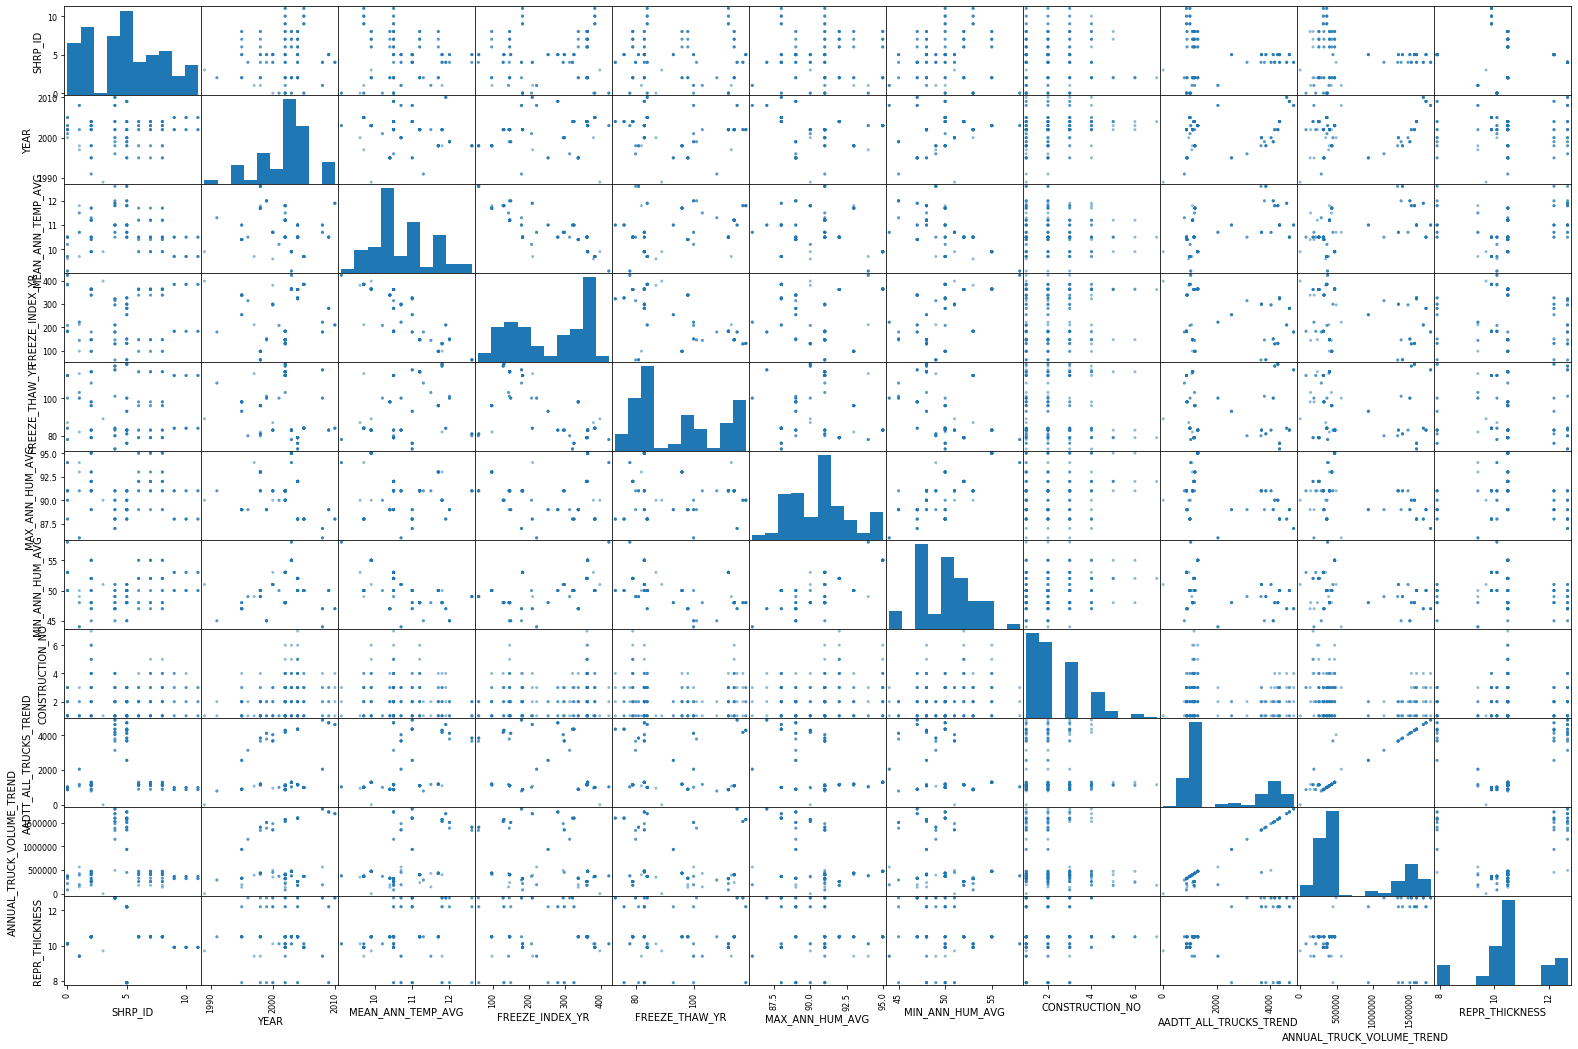

In [31]:
from pandas.plotting import scatter_matrix
attributes = [col for col in Prepared_data.columns]
scat_matrix = scatter_matrix(Prepared_data[attributes], figsize=(27, 18))

for ax in scat_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)

In [32]:
Prepared_data = StandardScaler().fit_transform(Prepared_data)

In [33]:
train_test_index = int(np.shape(Prepared_data)[0]*0.7)

In [34]:
tree_reg.fit(Prepared_data[0:train_test_index],Target_Labels[0:train_test_index])
forest_reg.fit(Prepared_data[0:train_test_index],Target_Labels[0:train_test_index])
lin_reg_model.fit(Prepared_data[0:train_test_index],Target_Labels[0:train_test_index])

/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
TreeRegResult = tree_reg.predict(Prepared_data)

In [36]:
ForestRegResult = forest_reg.predict(Prepared_data)

In [37]:
LinearRegResult = lin_reg_model.predict(Prepared_data)

In [53]:
LinearRegResult.shape

(184,)

In [50]:
# np.shape(TreeRegResult)[0]
x = np.arange(np.shape(Target_Labels)[0])

In [51]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

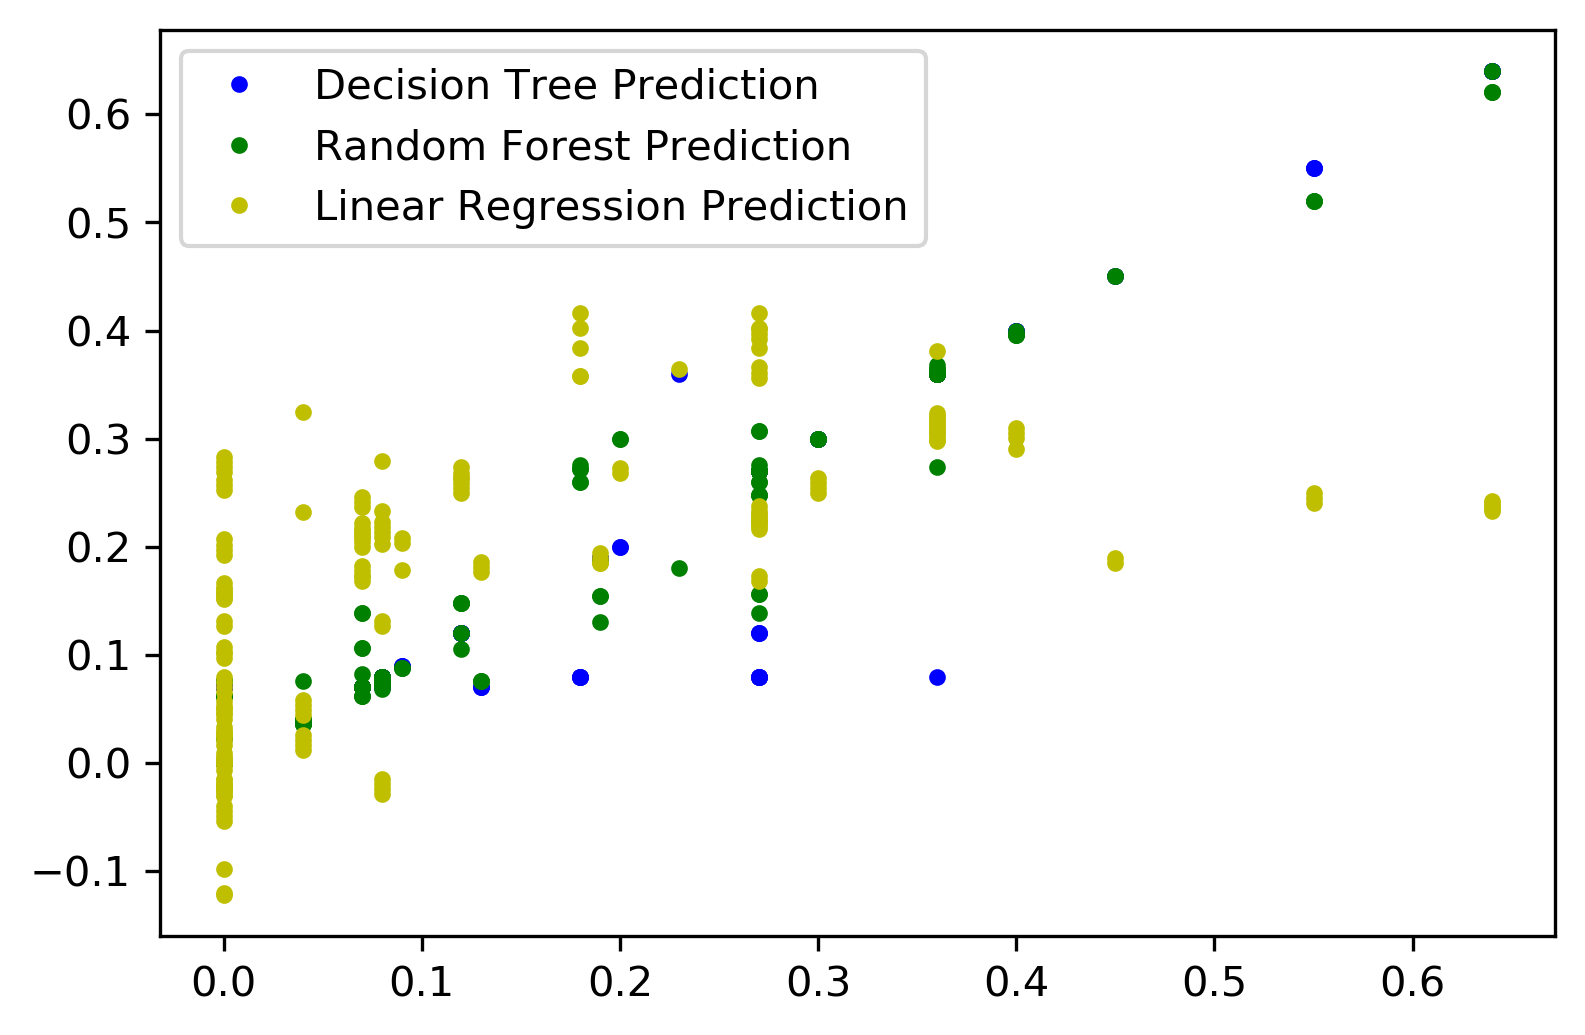

In [57]:
plt.rcParams['figure.figsize'] = (6, 4)
# plt.rcParams['figure.dpi'] = 300
# plt.plot(x,Target_Labels,'r.',label='Ground Truth')
plt.plot(Target_Labels,TreeRegResult,'b.',label='Decision Tree Prediction')
plt.plot(Target_Labels,ForestRegResult,'g.',label='Random Forest Prediction')
plt.plot(Target_Labels,LinearRegResult,'y.',label='Linear Regression Prediction')
plt.legend()
plt.show()

Time used: 0.017332077026367188
rmse scores: [0.0615587  0.03244428 0.04530598 0.         0.         0.22667279
 0.06599663 0.04242641 0.08733715 0.05153208]


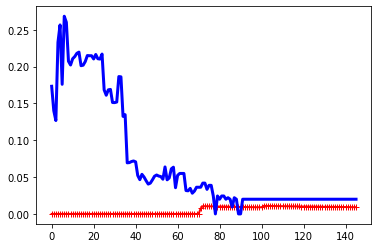

In [42]:
st = time.time()
tree_scores = cross_val_score(tree_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-tree_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(tree_reg, Prepared_data, Target_Labels)

In [43]:
st = time.time()
forest_scores = cross_val_score(forest_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-forest_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)

Time used: 0.12617969512939453
rmse scores: [0.0735064  0.13596362 0.03549796 0.02331591 0.02646591 0.08928287
 0.03159553 0.04763861 0.07479416 0.05135227]


/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/l

/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


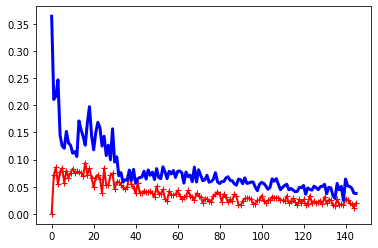

In [45]:
plot_learning_curves(forest_reg, Prepared_data, Target_Labels)

Time used: 0.018682003021240234
rmse scores: [0.10039817 0.29032837 0.15326999 0.07955589 0.06040476 0.17250225
 0.08431869 0.14705844 0.05394484 0.08028799]


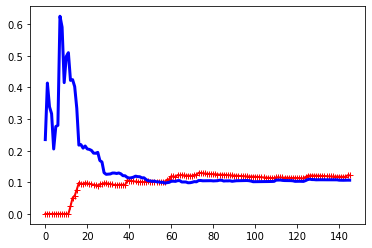

In [44]:
st = time.time()
lin_scores = cross_val_score(lin_reg_model, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-lin_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(lin_reg_model, Prepared_data, Target_Labels)